# CIFAR 10 - Categorical Classification

In [155]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [172]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

* Train_Data Information

In [173]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)

50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [174]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)

10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

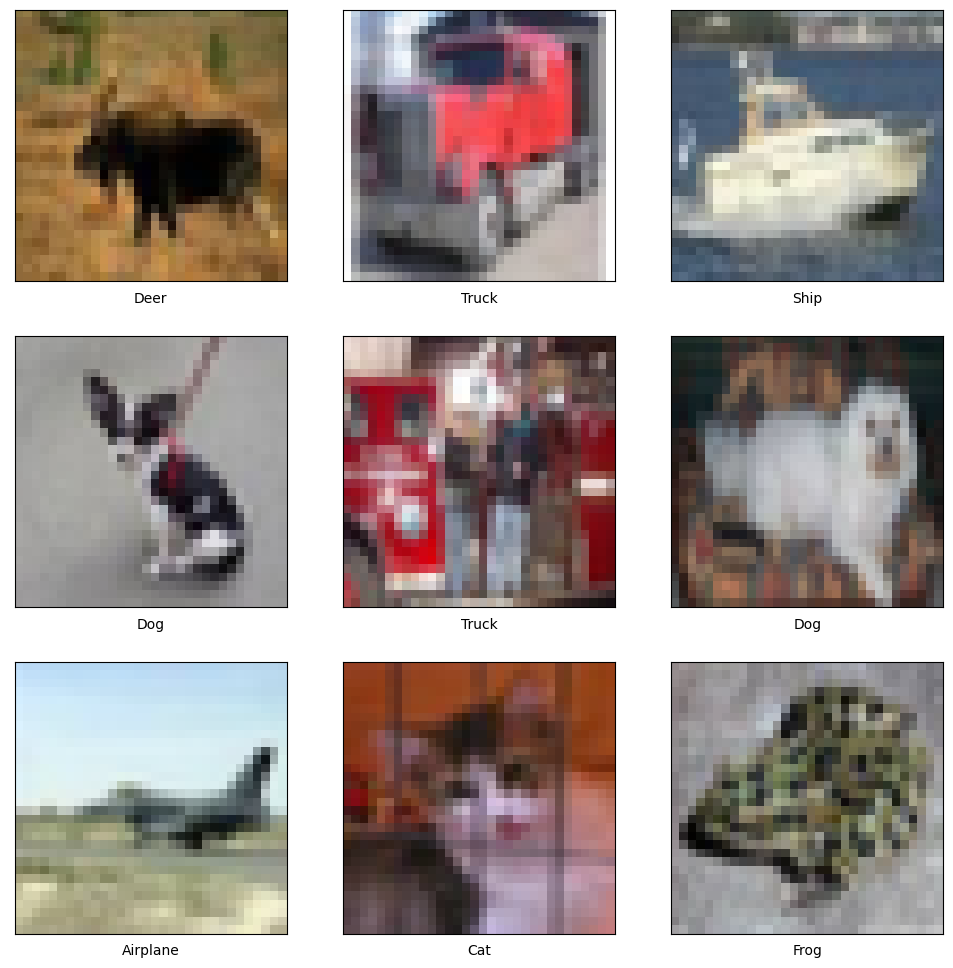

In [175]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

import matplotlib.pyplot as plt
import numpy as np

Indexes = np.random.randint(50000,
                            size = 9) 

plt.figure(figsize = (12, 12))
for i, idx in enumerate(Indexes):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx])
    plt.xlabel(class_names[int(y_train[idx])])
    
plt.show()

* RGB Channels

In [176]:
import numpy as np
import sys
np.set_printoptions(linewidth = 150, threshold = sys.maxsize)

print(y_train[0]) # 첫번째 라벨
print()
# print(X_train[0])
print(X_train[0][0][0]) # 첫번째 데이터의 첫째 행의 첫째 열의 픽셀값 r g b
# print(X_train[0][:,:,0]) # 첫번째 데이터의 전체 이미지의 특정 rgb값 0=r 1=g 2=b

[6]

[59 62 63]


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

In [177]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [178]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [179]:
X_train.shape

(50000, 3072)

In [18]:
X_train[0].shape

(3072,)

In [10]:
print(X_train[0])

[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]


> ## 2) One Hot Encoding

In [180]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [181]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


> ## 3) train_test_split( )

* Train(40,000) vs. Validation(10,000)

In [182]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045, stratify = y_train)

# III. Keras Modeling

## Base Line

In [21]:
# model define
from tensorflow.keras import models, layers

cifar_b = models.Sequential()
cifar_b.add(layers.Dense(512, activation = 'relu', input_shape = (X_train[0].shape ) ))
cifar_b.add(layers.Dense(256, activation = 'relu'))
cifar_b.add(layers.Dense(10, activation = 'softmax'))
cifar_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               1573376   
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [22]:
# model compile
cifar_b.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [23]:
# model fit
Hist_cifar_b = cifar_b.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 2.3052 - accuracy: 0.2305 - val_loss: 1.8673 - val_accuracy: 0.3265
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 1.8576 - accuracy: 0.3270 - val_loss: 1.8206 - val_accuracy: 0.3438
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 1.7624 - accuracy: 0.3696 - val_loss: 1.7129 - val_accuracy: 0.3787
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 1.6972 - accuracy: 0.3926 - val_loss: 1.8037 - val_accuracy: 0.3659
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 1.6383 - accuracy: 0.4149 - val_loss: 1.6878 - val_accuracy: 0.3941
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5980 - accuracy: 0.4312 - val_loss: 1.6078 - val_accuracy: 0.4261
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5548 - accuracy: 0.4438 - val_loss: 1.5457 - val_accuracy: 0.4519

Epoch 58/100
250/250 [==============================] - 0s 2ms/step - loss: 0.8002 - accuracy: 0.7169 - val_loss: 2.0511 - val_accuracy: 0.4832
Epoch 59/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7919 - accuracy: 0.7192 - val_loss: 2.1858 - val_accuracy: 0.4955
Epoch 60/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7837 - accuracy: 0.7169 - val_loss: 2.0893 - val_accuracy: 0.4924
Epoch 61/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7776 - accuracy: 0.7231 - val_loss: 2.0750 - val_accuracy: 0.4857
Epoch 62/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7710 - accuracy: 0.7258 - val_loss: 2.2567 - val_accuracy: 0.4635
Epoch 63/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7658 - accuracy: 0.7250 - val_loss: 2.1254 - val_accuracy: 0.4869
Epoch 64/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7591 - accuracy: 0.7292 - val_loss: 2.2432 - val_accuracy:

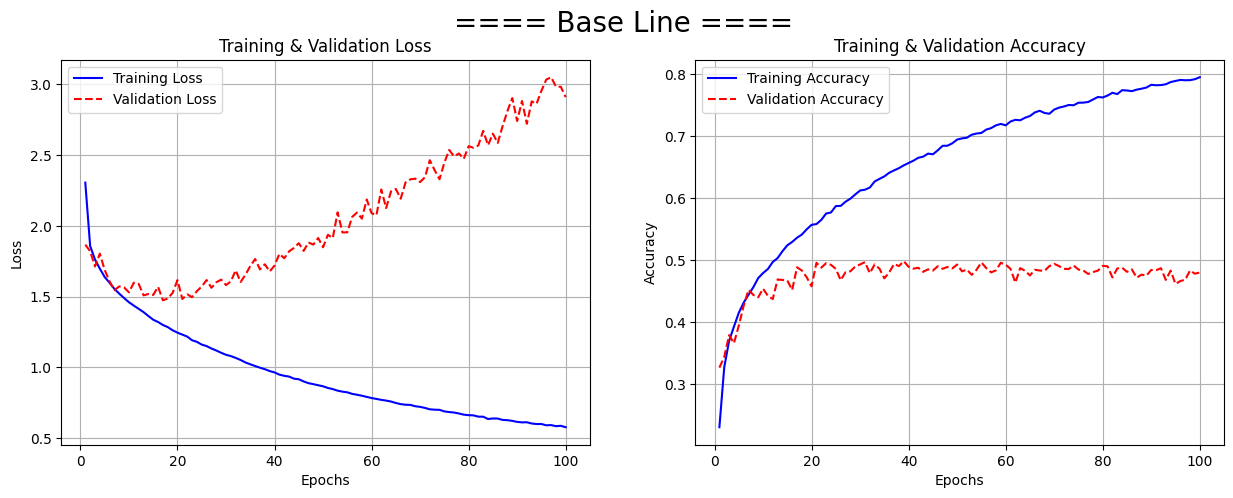

In [24]:
import matplotlib.pyplot as plt

Hist_model = Hist_cifar_b
epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Base Line ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Model Capacity decay

In [25]:
# model define
from tensorflow.keras import models, layers

cifar_c = models.Sequential()
cifar_c.add(layers.Dense(256, activation = 'relu', input_shape = (X_train[0].shape)))
cifar_c.add(layers.Dense(10, activation = 'softmax'))
cifar_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               786688    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [26]:
# model compile
cifar_c.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [27]:
# model fit
Hist_cifar_c = cifar_c.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 2.3595 - accuracy: 0.2314 - val_loss: 1.9521 - val_accuracy: 0.2968
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 1.8861 - accuracy: 0.3282 - val_loss: 1.8361 - val_accuracy: 0.3433
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 1.7987 - accuracy: 0.3614 - val_loss: 1.7530 - val_accuracy: 0.3706
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 1.7360 - accuracy: 0.3794 - val_loss: 1.7286 - val_accuracy: 0.3936
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 1.6987 - accuracy: 0.3970 - val_loss: 1.6945 - val_accuracy: 0.4005
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 1.6687 - accuracy: 0.4073 - val_loss: 1.7798 - val_accuracy: 0.3769
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 1.6394 - accuracy: 0.4182 - val_loss: 1.6616 - val_accuracy: 0.4145

Epoch 58/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2935 - accuracy: 0.5438 - val_loss: 1.5858 - val_accuracy: 0.4536
Epoch 59/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2873 - accuracy: 0.5460 - val_loss: 1.6095 - val_accuracy: 0.4624
Epoch 60/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2875 - accuracy: 0.5450 - val_loss: 1.5629 - val_accuracy: 0.4646
Epoch 61/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2873 - accuracy: 0.5468 - val_loss: 1.5884 - val_accuracy: 0.4588
Epoch 62/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2795 - accuracy: 0.5484 - val_loss: 1.6061 - val_accuracy: 0.4601
Epoch 63/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2781 - accuracy: 0.5496 - val_loss: 1.5653 - val_accuracy: 0.4726
Epoch 64/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2765 - accuracy: 0.5517 - val_loss: 1.6937 - val_accuracy:

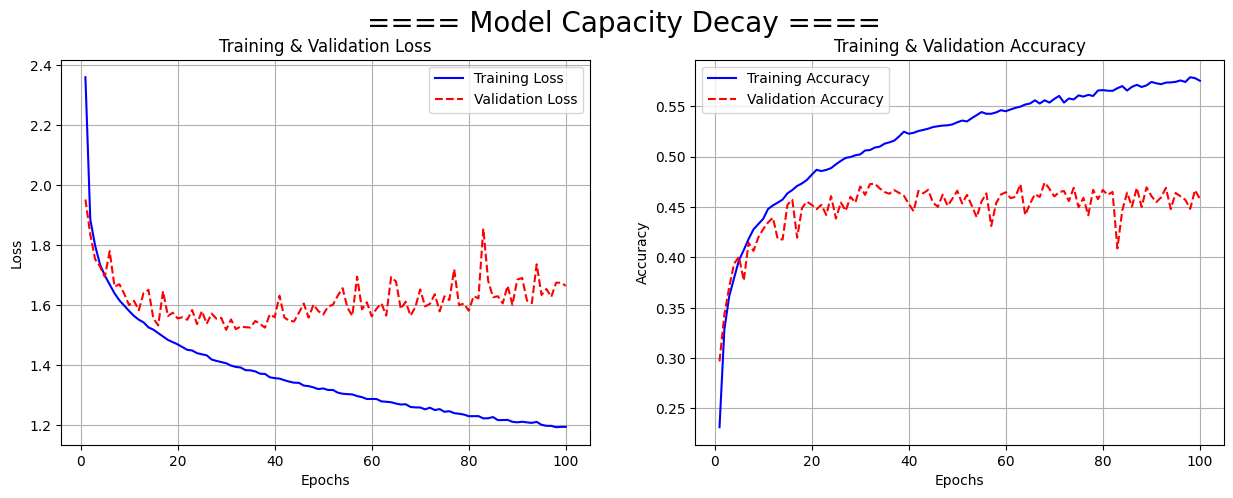

In [28]:
import matplotlib.pyplot as plt

Hist_model = Hist_cifar_c

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Model Capacity Decay ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Regulazation

In [29]:
from tensorflow.keras import models, layers, regularizers

cifar_L2R = models.Sequential()

cifar_L2R.add(layers.Dense(512, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001), # l2 기본값 0.01
                       input_shape = (X_train[0].shape)))

cifar_L2R.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))

cifar_L2R.add(layers.Dense(10, activation = 'softmax'))

cifar_L2R.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [30]:
cifar_L2R.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [31]:
# %%time

Hist_cifar_L2R = cifar_L2R.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 2.3199 - accuracy: 0.2309 - val_loss: 1.9783 - val_accuracy: 0.2973
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 1.8667 - accuracy: 0.3258 - val_loss: 1.8300 - val_accuracy: 0.3501
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 1.7638 - accuracy: 0.3677 - val_loss: 1.7284 - val_accuracy: 0.3885
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 1.6983 - accuracy: 0.3974 - val_loss: 1.6398 - val_accuracy: 0.4115
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 1.6404 - accuracy: 0.4151 - val_loss: 1.6914 - val_accuracy: 0.3985
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5987 - accuracy: 0.4308 - val_loss: 1.5938 - val_accuracy: 0.4284
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5613 - accuracy: 0.4437 - val_loss: 1.5837 - val_accuracy: 0.4311

Epoch 58/100
250/250 [==============================] - 0s 2ms/step - loss: 0.9274 - accuracy: 0.6757 - val_loss: 1.9796 - val_accuracy: 0.4697
Epoch 59/100
250/250 [==============================] - 0s 2ms/step - loss: 0.9242 - accuracy: 0.6739 - val_loss: 1.8559 - val_accuracy: 0.4791
Epoch 60/100
250/250 [==============================] - 0s 2ms/step - loss: 0.9159 - accuracy: 0.6773 - val_loss: 1.8609 - val_accuracy: 0.4798
Epoch 61/100
250/250 [==============================] - 0s 2ms/step - loss: 0.9132 - accuracy: 0.6797 - val_loss: 1.9036 - val_accuracy: 0.4681
Epoch 62/100
250/250 [==============================] - 0s 2ms/step - loss: 0.9061 - accuracy: 0.6840 - val_loss: 1.8820 - val_accuracy: 0.4778
Epoch 63/100
250/250 [==============================] - 0s 2ms/step - loss: 0.8963 - accuracy: 0.6869 - val_loss: 1.9068 - val_accuracy: 0.4835
Epoch 64/100
250/250 [==============================] - 0s 2ms/step - loss: 0.8944 - accuracy: 0.6877 - val_loss: 1.9393 - val_accuracy:

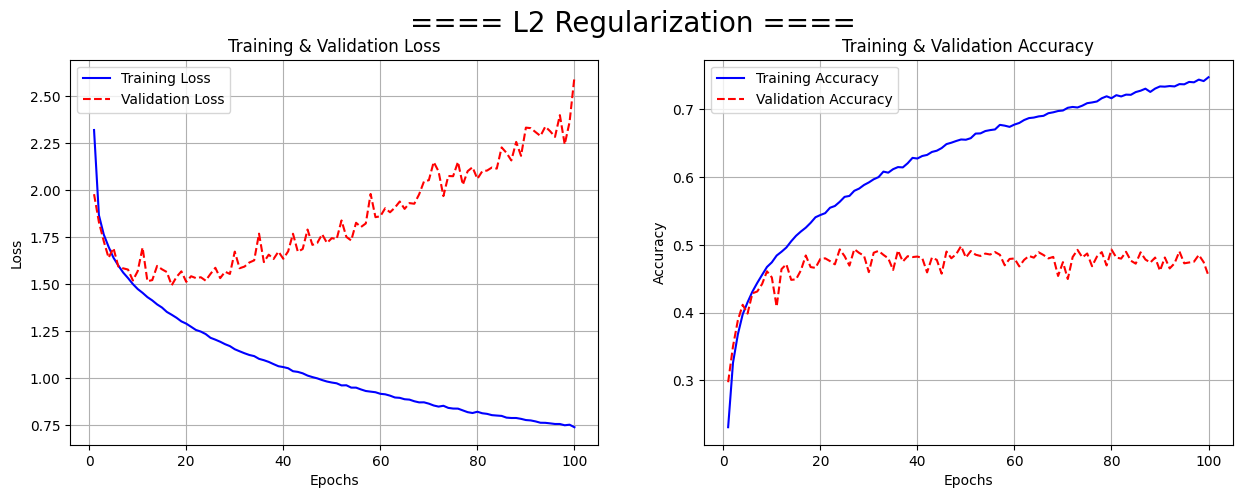

In [32]:
import matplotlib.pyplot as plt

Hist_model = Hist_cifar_L2R

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Drop out

In [33]:
cifar_D = models.Sequential()

cifar_D.add(layers.Dense(512, activation = 'relu', input_shape = (X_train[0].shape)))
cifar_D.add(layers.Dropout(0.4))

cifar_D.add(layers.Dense(256, activation = 'relu'))
cifar_D.add(layers.Dropout(0.2))

cifar_D.add(layers.Dense(10, activation = 'softmax'))

cifar_D.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [34]:
cifar_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [35]:
# %%time
Hist_cifar_D = cifar_D.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 2.2289 - accuracy: 0.2086 - val_loss: 1.8987 - val_accuracy: 0.3097
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 1.9768 - accuracy: 0.2778 - val_loss: 1.9077 - val_accuracy: 0.3001
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 1.9160 - accuracy: 0.3052 - val_loss: 1.8203 - val_accuracy: 0.3519
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 1.8684 - accuracy: 0.3204 - val_loss: 1.8239 - val_accuracy: 0.3494
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 1.8409 - accuracy: 0.3318 - val_loss: 1.8108 - val_accuracy: 0.3630
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 1.8124 - accuracy: 0.3426 - val_loss: 1.7753 - val_accuracy: 0.3856
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 1.8012 - accuracy: 0.3504 - val_loss: 1.7533 - val_accuracy: 0.3765

Epoch 58/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5712 - accuracy: 0.4378 - val_loss: 1.6353 - val_accuracy: 0.4231
Epoch 59/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5737 - accuracy: 0.4373 - val_loss: 1.6531 - val_accuracy: 0.4225
Epoch 60/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5704 - accuracy: 0.4382 - val_loss: 1.6468 - val_accuracy: 0.4319
Epoch 61/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5704 - accuracy: 0.4328 - val_loss: 1.6391 - val_accuracy: 0.4416
Epoch 62/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5698 - accuracy: 0.4390 - val_loss: 1.6188 - val_accuracy: 0.4286
Epoch 63/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5753 - accuracy: 0.4348 - val_loss: 1.6606 - val_accuracy: 0.4144
Epoch 64/100
250/250 [==============================] - 0s 2ms/step - loss: 1.5629 - accuracy: 0.4373 - val_loss: 1.6410 - val_accuracy:

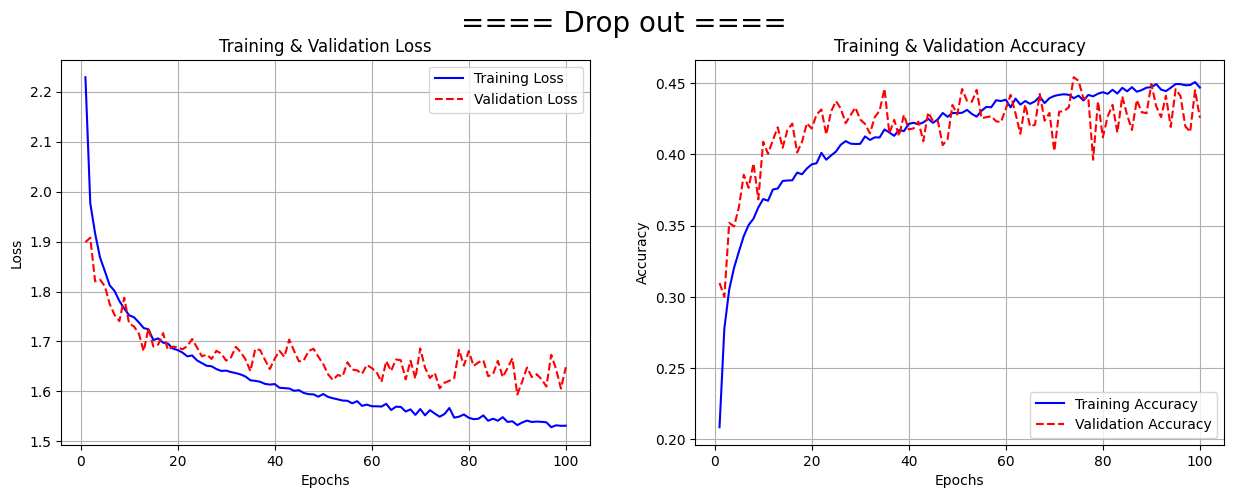

In [36]:
import matplotlib.pyplot as plt

Hist_model = Hist_cifar_D

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Drop out ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Batch Normalization

In [39]:
cifar_BN = models.Sequential()

cifar_BN.add(layers.Dense(512, input_shape = (X_train[0].shape)))
cifar_BN.add(layers.BatchNormalization())
cifar_BN.add(layers.Activation('relu'))

cifar_BN.add(layers.Dense(256 ))
cifar_BN.add(layers.BatchNormalization())
cifar_BN.add(layers.Activation('relu'))

cifar_BN.add(layers.Dense(10, activation = 'softmax'))
cifar_BN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               1573376   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 256)              

In [40]:
# %%time

cifar_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Hist_cifar_BN = cifar_BN.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 1.6768 - accuracy: 0.4031 - val_loss: 2.0636 - val_accuracy: 0.3158
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 1.4189 - accuracy: 0.4941 - val_loss: 1.7251 - val_accuracy: 0.3972
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 1.2842 - accuracy: 0.5430 - val_loss: 1.6760 - val_accuracy: 0.3951
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 1.1786 - accuracy: 0.5796 - val_loss: 1.7430 - val_accuracy: 0.3986
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 1.0865 - accuracy: 0.6179 - val_loss: 1.7718 - val_accuracy: 0.4061
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 1.0011 - accuracy: 0.6484 - val_loss: 1.7077 - val_accuracy: 0.4288
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.9210 - accuracy: 0.6786 - val_loss: 2.0955 - val_accuracy: 0.3769

Epoch 58/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0636 - accuracy: 0.9799 - val_loss: 6.0425 - val_accuracy: 0.4064
Epoch 59/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0624 - accuracy: 0.9792 - val_loss: 3.9763 - val_accuracy: 0.4798
Epoch 60/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0594 - accuracy: 0.9806 - val_loss: 4.1693 - val_accuracy: 0.4591
Epoch 61/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0591 - accuracy: 0.9801 - val_loss: 4.5853 - val_accuracy: 0.4674
Epoch 62/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0618 - accuracy: 0.9798 - val_loss: 4.8192 - val_accuracy: 0.4467
Epoch 63/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0602 - accuracy: 0.9803 - val_loss: 4.7193 - val_accuracy: 0.4491
Epoch 64/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0588 - accuracy: 0.9803 - val_loss: 4.2070 - val_accuracy:

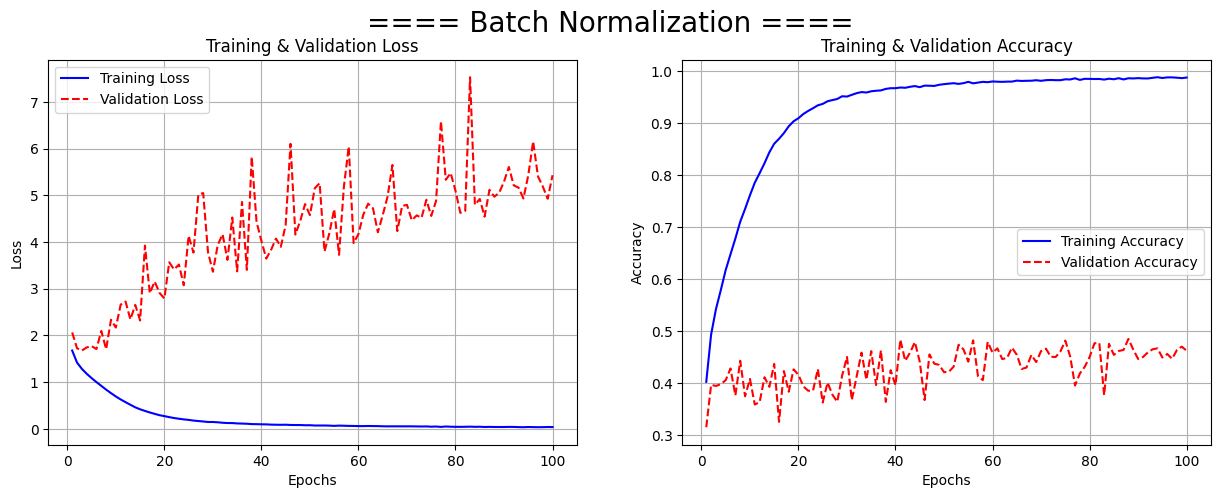

In [41]:
import matplotlib.pyplot as plt

Hist_model = Hist_cifar_BN

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Batch Normalization ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Result Comparison

In [47]:
hist_model_name = ['Hist_cifar_c', 'Hist_cifar_L2R', 'Hist_cifar_D', 'Hist_cifar_BN']
hist_model_list = [Hist_cifar_c, Hist_cifar_L2R, Hist_cifar_D, Hist_cifar_BN]

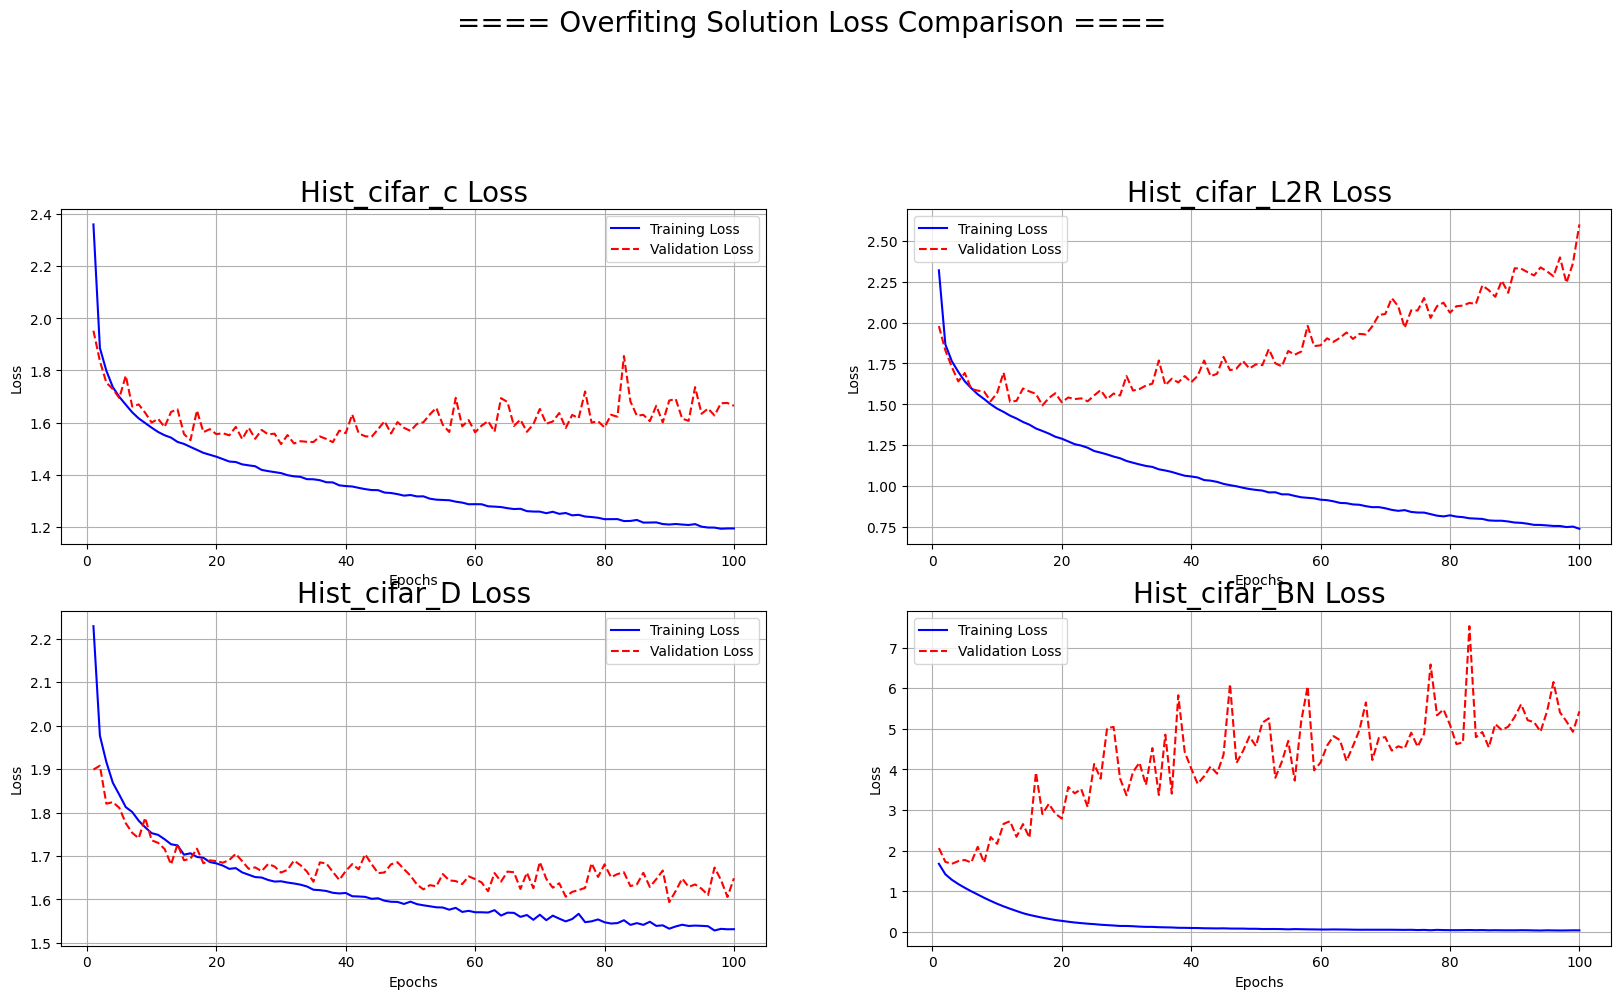

In [48]:
import matplotlib.pyplot as plt

epochs = range(1, 101)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Loss Comparison ====', fontsize=20)


for i in range(len(hist_model_list)):
    plt.subplot(len(hist_model_list), int(len(hist_model_list)/2), i+1)
    plt.plot(epochs, hist_model_list[i].history['loss'], 'b-')
    plt.plot(epochs, hist_model_list[i].history['val_loss'], 'r--')
    plt.title(f'{str(hist_model_name[i])} Loss', fontsize=20)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.grid()

plt.show()

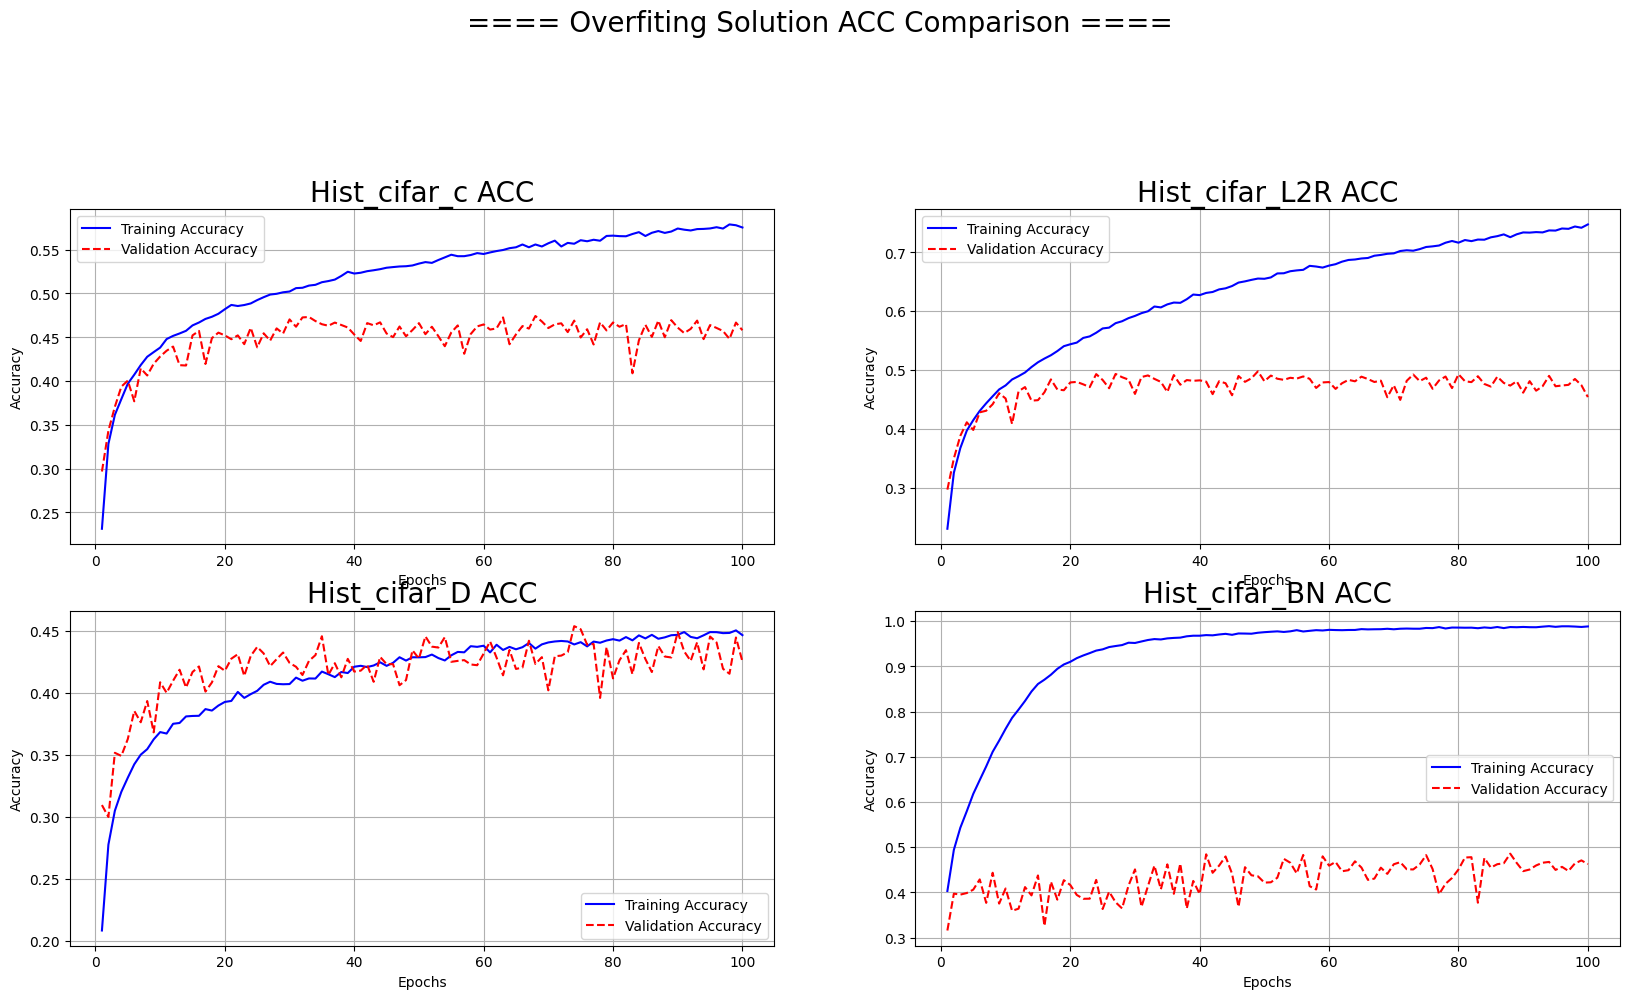

In [49]:
import matplotlib.pyplot as plt

epochs = range(1, 101)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution ACC Comparison ====', fontsize=20)


for i in range(len(hist_model_list)):
    plt.subplot(len(hist_model_list), int(len(hist_model_list)/2), i+1)
    plt.plot(epochs, hist_model_list[i].history['accuracy'], 'b-')
    plt.plot(epochs, hist_model_list[i].history['val_accuracy'], 'r--')
    plt.title(f'{str(hist_model_name[i])} ACC', fontsize=20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.grid()

plt.show()

## Result Summary
- capacity decay와 drop out이 가장 효과가 있다. 
- 다만 capacity를 낮추면 정확도가 낮아지니 , drop out모형의 170만 정도는 참고해서 유지하자.

# Model Develope

## Capacity Decay & Drop Out 

In [66]:
cifar_D2 = models.Sequential()

# cifar_D2.add(layers.Dense(512, activation = 'relu', input_shape = (X_train[0].shape)))
# cifar_D2.add(layers.Dropout(0.5))

cifar_D2.add(layers.Dense(512, activation = 'relu', input_shape = (X_train[0].shape) ))
cifar_D2.add(layers.Dropout(0.5))

cifar_D2.add(layers.Dense(256, activation = 'relu'))
cifar_D2.add(layers.Dropout(0.3))

cifar_D2.add(layers.Dense(128, activation = 'relu'))
cifar_D2.add(layers.Dropout(0.1))

cifar_D2.add(layers.Dense(10, activation = 'softmax'))

cifar_D2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 10)              

In [67]:
cifar_D2.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [68]:
# %%time
Hist_cifar_D2 = cifar_D2.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 2.2367 - accuracy: 0.1704 - val_loss: 2.0010 - val_accuracy: 0.2694
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 2.0307 - accuracy: 0.2425 - val_loss: 2.0018 - val_accuracy: 0.2679
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 1.9749 - accuracy: 0.2709 - val_loss: 1.9200 - val_accuracy: 0.3293
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 1.9397 - accuracy: 0.2898 - val_loss: 1.9488 - val_accuracy: 0.3058
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 1.9112 - accuracy: 0.2968 - val_loss: 1.9103 - val_accuracy: 0.3232
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 1.8959 - accuracy: 0.3050 - val_loss: 1.9084 - val_accuracy: 0.3249
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 1.8861 - accuracy: 0.3117 - val_loss: 1.8969 - val_accuracy: 0.3492

Epoch 58/100
250/250 [==============================] - 1s 2ms/step - loss: 1.6975 - accuracy: 0.3840 - val_loss: 1.7570 - val_accuracy: 0.3799
Epoch 59/100
250/250 [==============================] - 1s 2ms/step - loss: 1.6885 - accuracy: 0.3872 - val_loss: 1.7452 - val_accuracy: 0.4000
Epoch 60/100
250/250 [==============================] - 1s 2ms/step - loss: 1.6900 - accuracy: 0.3857 - val_loss: 1.8060 - val_accuracy: 0.3609
Epoch 61/100
250/250 [==============================] - 1s 2ms/step - loss: 1.6969 - accuracy: 0.3880 - val_loss: 1.7372 - val_accuracy: 0.4033
Epoch 62/100
250/250 [==============================] - 1s 2ms/step - loss: 1.6912 - accuracy: 0.3878 - val_loss: 1.7296 - val_accuracy: 0.4125
Epoch 63/100
250/250 [==============================] - 1s 2ms/step - loss: 1.6884 - accuracy: 0.3889 - val_loss: 1.7562 - val_accuracy: 0.3844
Epoch 64/100
250/250 [==============================] - 1s 2ms/step - loss: 1.6827 - accuracy: 0.3934 - val_loss: 1.7070 - val_accuracy:

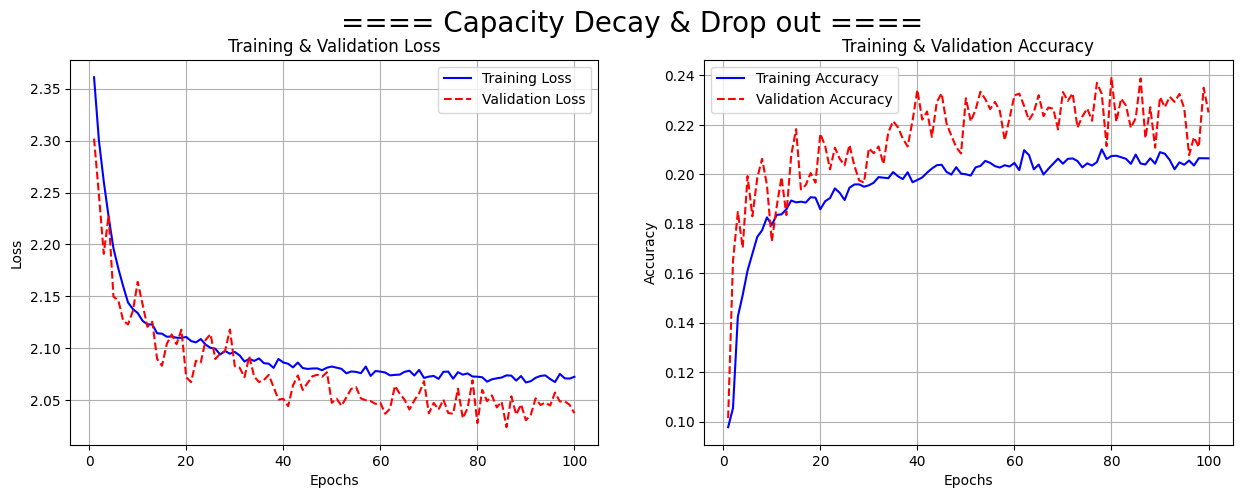

In [59]:
import matplotlib.pyplot as plt

Hist_model = Hist_cifar_D2

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Capacity Decay & Drop out ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

## Capacity Decay & Drop Out 2

In [63]:
cifar_D3 = models.Sequential()

cifar_D3.add(layers.Dense(256, activation = 'relu', input_shape = (X_train[0].shape) ))
cifar_D3.add(layers.Dropout(0.5))

cifar_D3.add(layers.Dense(64, activation = 'relu'))
cifar_D3.add(layers.Dropout(0.5))

cifar_D3.add(layers.Dense(10, activation = 'softmax'))

cifar_D3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 256)               786688    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                16448     
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
Total params: 803,786
Trainable params: 803,786
Non-trainable params: 0
_________________________________________________________________


In [64]:
# %%time
cifar_D3.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Hist_cifar_D3 = cifar_D3.fit(X_train, y_train,
                       epochs = 150,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/150
250/250 [==============================] - 1s 2ms/step - loss: 2.3116 - accuracy: 0.1416 - val_loss: 2.1364 - val_accuracy: 0.2004
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 2.1527 - accuracy: 0.1778 - val_loss: 2.0355 - val_accuracy: 0.2659
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 2.1103 - accuracy: 0.1914 - val_loss: 2.0114 - val_accuracy: 0.3027
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 2.0736 - accuracy: 0.2181 - val_loss: 1.9668 - val_accuracy: 0.2954
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 2.0522 - accuracy: 0.2241 - val_loss: 1.9742 - val_accuracy: 0.3052
Epoch 6/150
250/250 [==============================] - 0s 2ms/step - loss: 2.0377 - accuracy: 0.2292 - val_loss: 1.9623 - val_accuracy: 0.2760
Epoch 7/150
250/250 [==============================] - 0s 2ms/step - loss: 2.0253 - accuracy: 0.2335 - val_loss: 1.9587 - val_accuracy: 0.3178

Epoch 58/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9511 - accuracy: 0.2747 - val_loss: 1.9338 - val_accuracy: 0.3018
Epoch 59/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9515 - accuracy: 0.2770 - val_loss: 1.9218 - val_accuracy: 0.3144
Epoch 60/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9508 - accuracy: 0.2754 - val_loss: 1.9280 - val_accuracy: 0.3065
Epoch 61/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9476 - accuracy: 0.2779 - val_loss: 1.9382 - val_accuracy: 0.3229
Epoch 62/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9568 - accuracy: 0.2757 - val_loss: 1.9194 - val_accuracy: 0.3240
Epoch 63/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9536 - accuracy: 0.2723 - val_loss: 1.9306 - val_accuracy: 0.3133
Epoch 64/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9573 - accuracy: 0.2727 - val_loss: 1.9284 - val_accuracy:

Epoch 115/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9482 - accuracy: 0.2741 - val_loss: 1.9127 - val_accuracy: 0.3146
Epoch 116/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9386 - accuracy: 0.2821 - val_loss: 1.8724 - val_accuracy: 0.3470
Epoch 117/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9447 - accuracy: 0.2809 - val_loss: 1.9111 - val_accuracy: 0.3103
Epoch 118/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9509 - accuracy: 0.2766 - val_loss: 1.9316 - val_accuracy: 0.2929
Epoch 119/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9404 - accuracy: 0.2786 - val_loss: 1.8852 - val_accuracy: 0.3014
Epoch 120/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9399 - accuracy: 0.2804 - val_loss: 1.8886 - val_accuracy: 0.3206
Epoch 121/150
250/250 [==============================] - 0s 2ms/step - loss: 1.9461 - accuracy: 0.2799 - val_loss: 1.9025 - val_ac

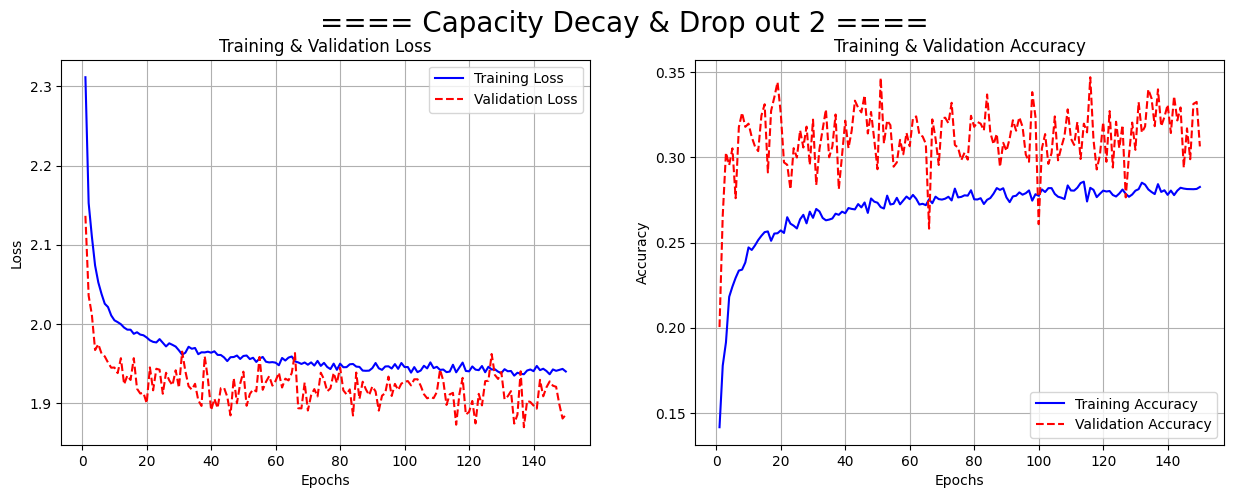

In [65]:
import matplotlib.pyplot as plt

Hist_model = Hist_cifar_D3

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Capacity Decay & Drop out 2 ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Model Fit with Callbacks

In [122]:
from tensorflow.keras import models, layers

cifar_final = models.Sequential(name = 'EarlyStopping')
cifar_final.add(layers.Dense(512, activation = 'relu', input_shape = (X_train[0].shape)))
cifar_final.add(layers.Dropout(0.3))

cifar_final.add(layers.Dense(256, activation = 'relu'))
cifar_final.add(layers.Dropout(0.2))

cifar_final.add(layers.Dense(128, activation = 'relu'))
cifar_final.add(layers.Dropout(0.1))

cifar_final.add(layers.Dense(64, activation = 'relu'))

cifar_final.add(layers.Dense(10, activation = 'softmax'))

cifar_final.compile(loss = 'categorical_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['accuracy'])

In [123]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', 
                   mode = 'min', 
                   patience = 10, 
                   verbose = 1)

In [124]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_model.h5', 
                     monitor = 'val_accuracy', 
                     mode = 'max', 
                     save_best_only = True,
                     verbose = 1)

In [125]:
Hist_cifar_final = cifar_final.fit(X_train, y_train,
                         epochs = 200,
                         batch_size = 128,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/200
226/250 [==========================>...] - ETA: 0s - loss: 2.2111 - accuracy: 0.1915
Epoch 1: val_accuracy improved from -inf to 0.26812, saving model to best_model.h5
250/250 [==============================] - 1s 3ms/step - loss: 2.1946 - accuracy: 0.1968 - val_loss: 1.9929 - val_accuracy: 0.2681
Epoch 2/200
221/250 [=========================>....] - ETA: 0s - loss: 1.9596 - accuracy: 0.2831
Epoch 2: val_accuracy improved from 0.26812 to 0.33250, saving model to best_model.h5
250/250 [==============================] - 1s 2ms/step - loss: 1.9540 - accuracy: 0.2844 - val_loss: 1.8311 - val_accuracy: 0.3325
Epoch 3/200
244/250 [============================>.] - ETA: 0s - loss: 1.8956 - accuracy: 0.3143
Epoch 3: val_accuracy improved from 0.33250 to 0.33825, saving model to best_model.h5
250/250 [==============================] - 1s 2ms/step - loss: 1.8968 - accuracy: 0.3142 - val_loss: 1.8408 - val_accuracy: 0.3383
Epoch 4/200
248/250 [============================>.] - ETA: 0

250/250 [==============================] - 1s 2ms/step - loss: 1.5593 - accuracy: 0.4387 - val_loss: 1.5686 - val_accuracy: 0.4450
Epoch 29/200
246/250 [============================>.] - ETA: 0s - loss: 1.5544 - accuracy: 0.4444
Epoch 29: val_accuracy did not improve from 0.46262
250/250 [==============================] - 1s 2ms/step - loss: 1.5548 - accuracy: 0.4444 - val_loss: 1.5926 - val_accuracy: 0.4437
Epoch 30/200
219/250 [=========================>....] - ETA: 0s - loss: 1.5495 - accuracy: 0.4430
Epoch 30: val_accuracy did not improve from 0.46262
250/250 [==============================] - 1s 2ms/step - loss: 1.5523 - accuracy: 0.4419 - val_loss: 1.5511 - val_accuracy: 0.4546
Epoch 31/200
231/250 [==========================>...] - ETA: 0s - loss: 1.5471 - accuracy: 0.4433
Epoch 31: val_accuracy did not improve from 0.46262
250/250 [==============================] - 1s 2ms/step - loss: 1.5466 - accuracy: 0.4438 - val_loss: 1.5620 - val_accuracy: 0.4511
Epoch 32/200
250/250 [====

Epoch 57/200
249/250 [============================>.] - ETA: 0s - loss: 1.4652 - accuracy: 0.4738
Epoch 57: val_accuracy did not improve from 0.48138
250/250 [==============================] - 1s 2ms/step - loss: 1.4654 - accuracy: 0.4736 - val_loss: 1.4934 - val_accuracy: 0.4671
Epoch 58/200
242/250 [============================>.] - ETA: 0s - loss: 1.4653 - accuracy: 0.4781
Epoch 58: val_accuracy did not improve from 0.48138
250/250 [==============================] - 1s 2ms/step - loss: 1.4662 - accuracy: 0.4776 - val_loss: 1.4917 - val_accuracy: 0.4766
Epoch 59/200
236/250 [===========================>..] - ETA: 0s - loss: 1.4580 - accuracy: 0.4753
Epoch 59: val_accuracy did not improve from 0.48138
250/250 [==============================] - 1s 2ms/step - loss: 1.4576 - accuracy: 0.4755 - val_loss: 1.4985 - val_accuracy: 0.4771
Epoch 60/200
250/250 [==============================] - ETA: 0s - loss: 1.4543 - accuracy: 0.4789
Epoch 60: val_accuracy did not improve from 0.48138
250/250

Epoch 86/200
240/250 [===========================>..] - ETA: 0s - loss: 1.4189 - accuracy: 0.4937
Epoch 86: val_accuracy did not improve from 0.49000
250/250 [==============================] - 1s 2ms/step - loss: 1.4187 - accuracy: 0.4937 - val_loss: 1.4688 - val_accuracy: 0.4794
Epoch 87/200
238/250 [===========================>..] - ETA: 0s - loss: 1.4087 - accuracy: 0.4965
Epoch 87: val_accuracy did not improve from 0.49000
250/250 [==============================] - 1s 2ms/step - loss: 1.4091 - accuracy: 0.4959 - val_loss: 1.4791 - val_accuracy: 0.4737
Epoch 88/200
222/250 [=========================>....] - ETA: 0s - loss: 1.4106 - accuracy: 0.4971
Epoch 88: val_accuracy did not improve from 0.49000
250/250 [==============================] - 1s 2ms/step - loss: 1.4119 - accuracy: 0.4967 - val_loss: 1.4667 - val_accuracy: 0.4841
Epoch 89/200
247/250 [============================>.] - ETA: 0s - loss: 1.4077 - accuracy: 0.4982
Epoch 89: val_accuracy did not improve from 0.49000
250/250

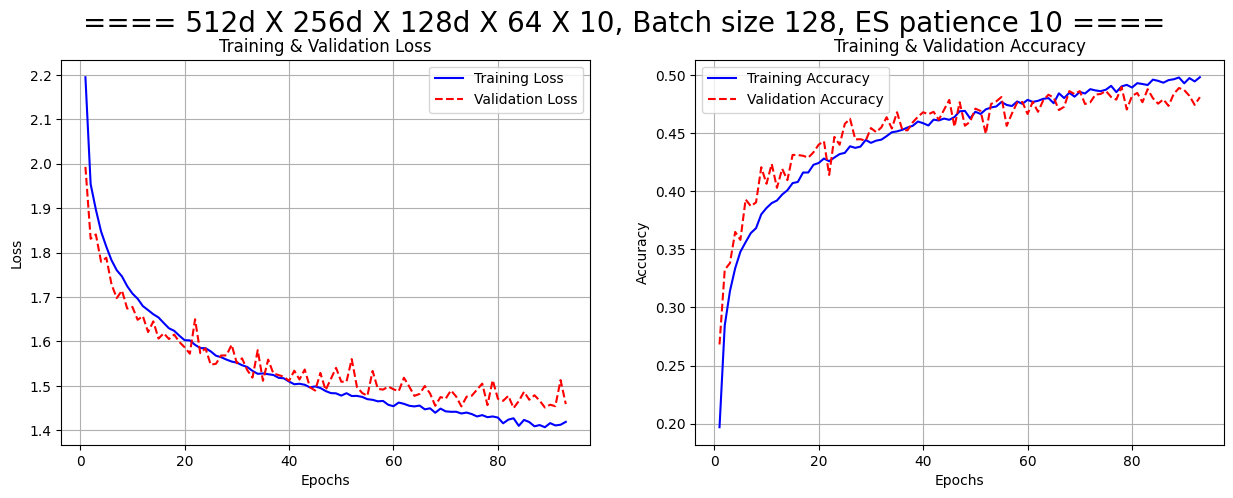

In [126]:
import matplotlib.pyplot as plt

Hist_model = Hist_cifar_final

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== 512d X 256d X 128d X 64 X 10, Batch size 128, ES patience 10 ====', fontsize=20)


plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [127]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')
best_model.summary()

Model: "EarlyStopping"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_37 (Dropout)        (None, 512)               0         
                                                                 
 dense_75 (Dense)            (None, 256)               131328    
                                                                 
 dropout_38 (Dropout)        (None, 256)               0         
                                                                 
 dense_76 (Dense)            (None, 128)               32896     
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 64)              

In [128]:
# Evaluate
loss, accuracy = best_model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 1.4440 - accuracy: 0.4863
Loss = 1.44398
Accuracy = 0.48630


In [139]:
# Predict
y_pred = np.round(best_model.predict(X_test, verbose = 0))
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [144]:
class_names

['Airplane',
 'Automobile',
 'Bird',
 'Cat',
 'Deer',
 'Dog',
 'Frog',
 'Horse',
 'Ship',
 'Truck']

In [ ]:
np.argmax(y_test, axis=1)

In [146]:
from sklearn.metrics import confusion_matrix

confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1) )

array([[894,   0,   7,   0,   1,   2,   5,   0,  83,   8],
       [654, 230,   1,   0,   3,   1,   1,   1,  14,  95],
       [876,   1,  33,   2,  40,  11,  24,   7,   3,   3],
       [894,   1,   1,  19,   6,  30,  35,   3,   3,   8],
       [793,   0,   3,   0, 157,   3,  30,   8,   4,   2],
       [827,   0,   2,   5,   7, 127,  16,  11,   2,   3],
       [672,   0,   1,   0,  23,   3, 298,   1,   1,   1],
       [685,   2,   1,   1,  27,  13,   4, 249,   3,  15],
       [533,  11,   0,   0,   1,   0,   1,   0, 433,  21],
       [593,  37,   0,   0,   0,   2,   8,   3,  10, 347]], dtype=int64)

In [149]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), 
                            digits = 5))

              precision    recall  f1-score   support

           0    0.12047   0.89400   0.21233      1000
           1    0.81560   0.23000   0.35881      1000
           2    0.67347   0.03300   0.06292      1000
           3    0.70370   0.01900   0.03700      1000
           4    0.59245   0.15700   0.24822      1000
           5    0.66146   0.12700   0.21309      1000
           6    0.70616   0.29800   0.41913      1000
           7    0.87986   0.24900   0.38815      1000
           8    0.77878   0.43300   0.55656      1000
           9    0.68986   0.34700   0.46174      1000

    accuracy                        0.27870     10000
   macro avg    0.66218   0.27870   0.29579     10000
weighted avg    0.66218   0.27870   0.29579     10000



In [169]:
X_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        [166, 118,  53],
        [160, 112,  46],
        [156, 109,  41],
        [162, 115,  47],
        [159, 113,  45],
        [158, 111,  44],
        [159, 113,  41],
        [161, 116,  41],
        [160, 111,  52],
        [161, 111,  49],
        [166, 117,  41],
        [169, 117,  45],
        [170, 119,  44],
        [167, 117,  40],
        [162, 113,  38],
        [160, 111,  39],
        [160, 112,  43],
        [156, 109,  44],
        [149, 107,  45],
        [150, 107,  45],
        [148, 106,  43],
        [149, 107,  44],
        [143, 101,  39],
        [140,  98,  43],
        [141,  97,  41],
        [143,  97,  38],
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        [166, 116,  56],
        [162, 112,  49],
        [160, 113,  43],
        [164, 117,  47],
        [162, 114,  45]

In [184]:
from tensorflow.keras import backend as K

K.clear_session()

In [186]:
np.set_printoptions(suppress = True, precision = 9)

print(best_model.predict(X_test[:1,:], verbose = 0))

[[0.042219445 0.019902509 0.04653349  0.37964904  0.037924264 0.27773392  0.12930168  0.017216163 0.026034668 0.023484726]]


In [187]:
print(np.argmax(best_model.predict(X_test[:1,:], verbose = 0)))

3


In [188]:
class_names

['Airplane',
 'Automobile',
 'Bird',
 'Cat',
 'Deer',
 'Dog',
 'Frog',
 'Horse',
 'Ship',
 'Truck']

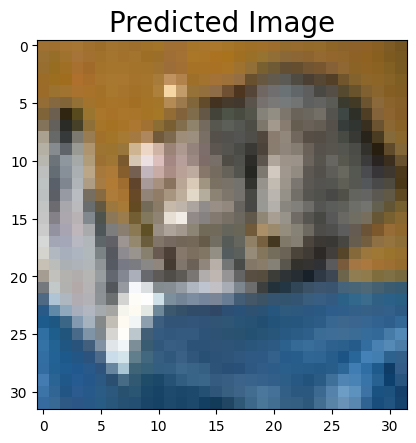

In [166]:
plt.imshow(X_test[0].reshape(32, 32, 3), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()

# 
# 
# 
# The End
# 
# 
# 